In [1]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 100
ij = (1, 3)

In [2]:
%matplotlib inline
A = [
    [0.75, 0, 0, 0, 0, 1.2],
    [-.1, -.35, 0, 0, 0, 0],
    [0, 0, .85, -1, 0, 0],
    [0, -.73, 0, .95, 0, 0],
    [0, 0, .43, 0, -.6, 0],
    [0, 0, 0, 0, .2, .55]

]
A = np.array(A)
B = [
    [1.4, 0, 0],
    [0, -.25, 0],
    [0, 0, 0.75],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
]
B = np.array(B)
C = [
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
]
C = np.array(C)

# u = pd.read_csv('../scripts/u.csv', header=None).values
u = np.random.rand(R * 6 + 1, 3)
y = ss_sim(A, B, C, u)

Pbool = np.identity(3)

real_params = {
    (1, 3): [.51, .75, -.11, -.6, -.816, .55],
    (2, 1): [.286, -.35],
    (3, 2): [7.684, .95, -8.588, .85]
}



In [3]:
def run(std, plot=False):
    recon = Reconstructor(debug=False, r=R, Pbool=Pbool, bounds=10, order=4, real_params=real_params, robust=True)
    i = ij[0] 
    j = ij[1] 
    
    bogus = np.zeros(R)
    params = recon.measured(y + np.random.randn(y.shape[0], y.shape[1]) * std, u, plot=False, ij=ij)
    params = params[i][j]
    
    err_bogus, real = recon._fiterr(real_params[ij], bogus, True)
    err, rcst = recon._fiterr(params, real, True)    
        
    if plot:
        plt.figure()
        plt.plot(range(R), real, label='Actual Parameters')
        plt.plot(range(R), rcst, label='Reconstructed Parameters')
        plt.legend()
        
    return err

In [4]:
rs = {}
step = 0.1
pwrs = np.arange(-2, 5.5, .5)
rng = [10**pwr for pwr in pwrs]
for std in rng:
    print('Running {}'.format(std))
    rs[std] = run(std)
    print('\tDone. Error = {:.3f}'.format(rs[std]))

Running 0.01
	Done. Error = 0.003
Running 0.03162277660168379
	Done. Error = 0.004
Running 0.1
	Done. Error = 0.006
Running 0.31622776601683794
	Done. Error = 0.020
Running 1.0
	Done. Error = 0.010
Running 3.1622776601683795
	Done. Error = 0.013
Running 10.0
	Done. Error = 0.019
Running 31.622776601683793
	Done. Error = 0.019
Running 100.0
	Done. Error = 0.019
Running 316.22776601683796
	Done. Error = 0.019
Running 1000.0
	Done. Error = 0.022
Running 3162.2776601683795
	Done. Error = 0.019
Running 10000.0
	Done. Error = 0.019
Running 31622.776601683792
	Done. Error = 0.019
Running 100000.0
	Done. Error = 0.019


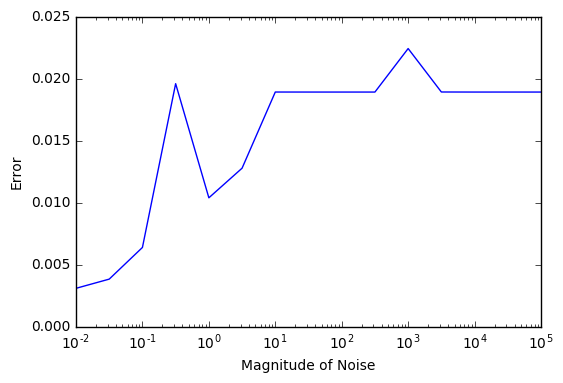

In [5]:
plt.figure()
plt.semilogx([key for key in rng], [rs[key] for key in rng])
plt.xlabel('Magnitude of Noise')
plt.ylabel('Error')

0.018941923032791141

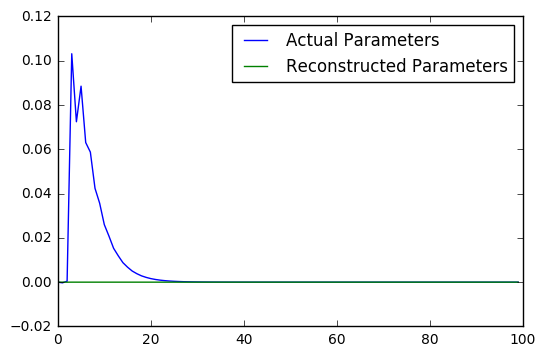

In [6]:
run(100, plot=True)